# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time as t

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [28]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [29]:
counter = 0
setcounter = 0
responsename = []
responsedate = []
responsecnt = []
responsetemp = []
responsehum = []
responsecloud = []
responsewind = []
responselat = []
responselon = []
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + '&units=imperial'  
    response = requests.get(query_url).json()
    
    try:
        name = response['name']
    except:
        print(f"City not found, testing next.")
    try:
        date = response['main']['temp_max']
    except:
        next
    try:
        cnt = response['sys']['country']
    except:
        next
    try:
        time = response['dt']
    except:
        next
    try:
        hum = response['main']['humidity']
    except:
        next
    try:
        cloud = response['clouds']['all']
    except:
        next
    try: 
        temp = response['main']['temp_max']
    except:
        next
    try:
        wind = response['wind']['speed']
    except:
        next
    try:
        lat = response['coord']['lat']
    except:
        next
    try:
        lon = response['coord']['lon']
    except:
        next
    responselon.append(lon)        
    responselat.append(lat)
    responsewind.append(wind)
    responsename.append(name)
    responsetemp.append(temp)
    responsecnt.append(cnt)
    responsedate.append(time)
    responsehum.append(hum)
    responsecloud.append(cloud)
    
    counter = counter + 1
    
    if counter == 50:
        t.sleep(10)
    if counter == 100:
        t.sleep(10)    
    if counter == 150:
        t.sleep(10)
    if counter == 200:
        t.sleep(10)    
    if counter == 250:
        t.sleep(10)
    if counter == 300:
        t.sleep(10)
    if counter == 350:
        t.sleep(10)
    if counter == 400:
        t.sleep(10)
    if counter == 450:
        t.sleep(10)
    if counter == 500:
        t.sleep(10)
    if counter == 550:
        t.sleep(10)
    if counter == 600:
        t.sleep(10)
                                          
    print(f"Processing city number:{counter}  City name:{city}")

Processing city number:1  City name:esperance
Processing city number:2  City name:narsaq
Processing city number:3  City name:port elizabeth
Processing city number:4  City name:lavrentiya
Processing city number:5  City name:atuona
Processing city number:6  City name:morondava
Processing city number:7  City name:jumla
City not found, testing next.
Processing city number:8  City name:olafsvik
City not found, testing next.
Processing city number:9  City name:zachagansk
Processing city number:10  City name:hithadhoo
Processing city number:11  City name:puerto ayora
Processing city number:12  City name:ilulissat
City not found, testing next.
Processing city number:13  City name:barentsburg
Processing city number:14  City name:phan thiet
Processing city number:15  City name:punta arenas
Processing city number:16  City name:rikitea
Processing city number:17  City name:kodiak
Processing city number:18  City name:saint-philippe
Processing city number:19  City name:hobart
Processing city number:2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
citydata = []
citydata = zip(responsename, responsecloud, responsecnt, responsedate, responsehum, responselat, responselon, responsetemp, responsewind)

In [31]:
citydf = pd.DataFrame(citydata)

In [32]:
citydf = citydf.rename(index = str, columns = {0:"City", 1:'Cloud Cover',2:'Country',3:'Date',4:'Humidity',5:'Lat',6:'Lon', 7:'Temp',8:'Wind Speed'})

In [33]:
citydf.count()

City           593
Cloud Cover    593
Country        593
Date           593
Humidity       593
Lat            593
Lon            593
Temp           593
Wind Speed     593
dtype: int64

In [34]:
citydf.head()

,City,Cloud Cover,Country,Date,Humidity,Lat,Lon,Temp,Wind Speed
0,Esperance,0,AU,1562176873,71,-33.86,121.89,51.80,14.99
1,Narsaq,20,GL,1562177631,41,60.91,-46.05,60.80,13.87
2,Port Elizabeth,1,US,1562177631,55,39.31,-74.98,91.99,10.29
3,Lavrentiya,4,RU,1562177131,73,65.58,-170.99,52.64,7.05
4,Atuona,20,PF,1562177041,66,-9.80,-139.03,80.36,9.86


In [35]:
citydf.to_csv('WeatherData.csv', index = False )

''

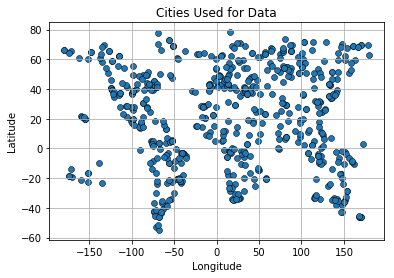

In [36]:
xlon = citydf['Lon']
ylat = citydf['Lat']
plt.scatter(xlon, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cities Used for Data')
fig = plt.gcf()
fig.savefig("Images/Cities.png")
;

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

''

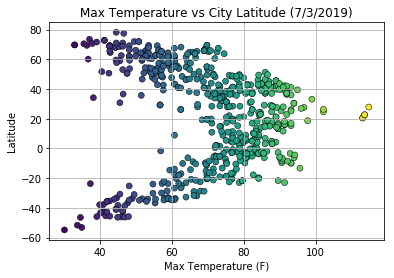

In [37]:
xtemp = citydf['Temp']
ylat = citydf['Lat']
plt.scatter(xtemp, ylat, c=xtemp, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title('Max Temperature vs City Latitude (7/3/2019)')
fig = plt.gcf()
fig.savefig("Images/Temp.png")
;

#### Latitude vs. Humidity Plot

''

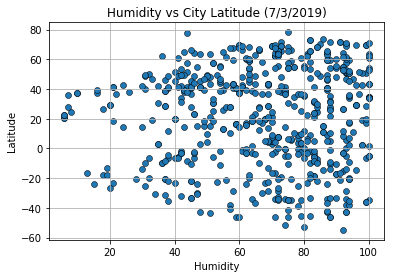

In [38]:
xhum = citydf['Humidity']
ylat = citydf['Lat']
plt.scatter(xhum, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Humidity vs City Latitude (7/3/2019)')
fig = plt.gcf()
fig.savefig("Images/Humidity.png")
;

#### Latitude vs. Cloudiness Plot

''

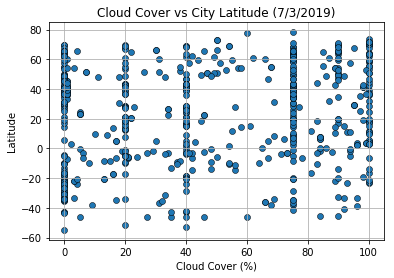

In [47]:
xcld = citydf['Cloud Cover']
ylat = citydf['Lat']
plt.scatter(xcld, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Latitude')
plt.title('Cloud Cover vs City Latitude (7/3/2019)')
fig = plt.gcf()
fig.savefig("Images/Clouds.png")
;

#### Latitude vs. Wind Speed Plot

''

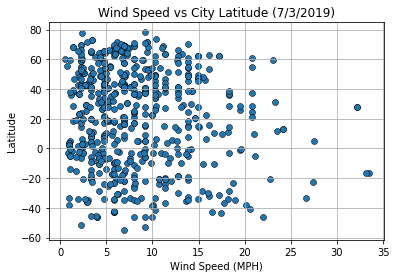

In [46]:
xwnd = citydf['Wind Speed']
ylat = citydf['Lat']
plt.scatter(xwnd, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.title('Wind Speed vs City Latitude (7/3/2019)')
fig = plt.gcf()
fig.savefig("Images/Wind.png")
;